# Example Usage for Solar Wind Time Series Viewer

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib tk

import sys
# set pyspedas path
# sys.path.insert(0,"/Users/huangzesen/work/pyspedas")
# add personal packages
sys.path.insert(0,"Solar-Wind-Time-Series-Viewer")
# sys.path.insert(0,"solar_wind_parser")

import pyspedas
from pytplot import get_data
from pyspedas.utilities import time_string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pathlib import Path
import os
import pickle
from gc import collect

from scipy.stats import shapiro
from multiprocessing import Pool

# from TSUtilities import FindIntervalInfo
from TimeSeriesViewer import TimeSeriesViewer
from LoadData import LoadHighResMagPSP
from BreakPointFinderGeneral import BreakPointFinder as BPFG
from TSUtilities import smoothing_function, TracePSD, trace_PSD_wavelet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


26-Jun-23 22:56:00: /Users/huangzesen/work/projects/tsviewer_blitting/Solar-Wind-Time-Series-Viewer/TSUtilities.py:400: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit( parallel =True)



# PSP Encounter Infos

https://psp-gateway.jhuapl.edu/website/SciencePlanning/Encounters

- E1: Perihelion (35.6 $R_{\odot}$): 2018-11-06/03:27
- E2: Perihelion (35.6 $R_{\odot}$): 2019-04-04/22:39
- E3: Perihelion (35.6 $R_{\odot}$): 2019-09-01/17:50
- E4: Perihelion (27.8 $R_{\odot}$): 2020-01-29/09:37
- E5: Perihelion (27.8 $R_{\odot}$): 2020-06-07/08:23
- E6: Perihelion (20.3 $R_{\odot}$): 2020-09-27/09:16
- E7: Perihelion (20.3 $R_{\odot}$): 2021-01-17/17:40
- E8: Perihelion (15.9 $R_{\odot}$): 2021-04-29/08:48
- E9: Perihelion (15.9 $R_{\odot}$): 2021-08-09/19:11
- E10: Perihelion (13.3 $R_{\odot}$): 2021-11-21/08:23
- E11: Perihelion (13.3 $R_{\odot}$): 2022-02-25/15:38
- E12: Perihelion (13.3 $R_{\odot}$): 2022-06-01/22:51
- E13: Perihelion (13.3 $R_{\odot}$): 2022-09-06/06:04
- E14: Perihelion (13.3 $R_{\odot}$): 2022-12-11/13:16
- E15: Perihelion (13.3 $R_{\odot}$): 2023-03-17/20:30
- E16: Perihelion (13.3 $R_{\odot}$): 2023-06-22/03:46
- E17: Perihelion (11.4 $R_{\odot}$): 2023-09-27/23:28
- E18: Perihelion (11.4 $R_{\odot}$): 2023-12-29/00:54
- E19: Perihelion (11.4 $R_{\odot}$): 2024-03-30/02:20
- E20: Perihelion (11.4 $R_{\odot}$): 2024-06-30/03:46
- E21: Perihelion (11.4 $R_{\odot}$): 2024-09-30/05:13
- E22: Perihelion (9.9 $R_{\odot}$): 2024-12-24/11:41
- E23: Perihelion (9.9 $R_{\odot}$): 2025-03-22/22:25
- E24: Perihelion (9.9 $R_{\odot}$): 2025-06-19/09:09

In [6]:
collect()

peri_dates = [pd.Timestamp(x) for x in [
    '2018-11-06/03:27',
    '2019-04-04/22:39',
    '2019-09-01/17:50',
    '2020-01-29/09:37',
    '2020-06-07/08:23',
    '2020-09-27/09:16',
    '2021-01-17/17:40',
    '2021-04-29/08:48',
    '2021-08-09/19:11',
    '2021-11-21/08:23',
    '2022-02-25/15:38',
    '2022-06-01/22:51',
    '2022-09-06/06:04',
    '2022-12-11/13:16',
    '2023-03-17/20:30',
    '2023-06-22/03:46',
    '2023-09-27/23:28',
    '2023-12-29/00:54',
    '2024-03-30/02:20',
    '2024-06-30/03:46',
    '2024-09-30/05:13',
    '2024-12-24/11:41',
    '2025-03-22/22:25',
    '2025-06-19/09:09'
]]

encounter = 12
wing = pd.Timedelta('1d')
t00 = peri_dates[encounter-1] - wing
t10 = peri_dates[encounter-1] + wing

tsv = TimeSeriesViewer(sc = 0, 
                       start_time_0 = t00, 
                       end_time_0 = t10, 
                       resample_rate = '5min', 
                       rolling_rate = '1H', 
                       resolution = 5,
                       LTSWsettings = {'must_have_qtn':False, 'particle_mode':'keep_all'}
                       # LTSWsettings = {'must_have_qtn':False, 'particle_mode':'spc_only'}
                       # LTSWsettings = {'must_have_qtn':False, 'particle_mode':'spc_only'}
                      )
clear_output()

print("t00 = %s, t10 = %s" %(t00, t10))
print("finished loading data")

t00 = 2022-05-31 22:51:00, t10 = 2022-06-02 22:51:00
finished loading data


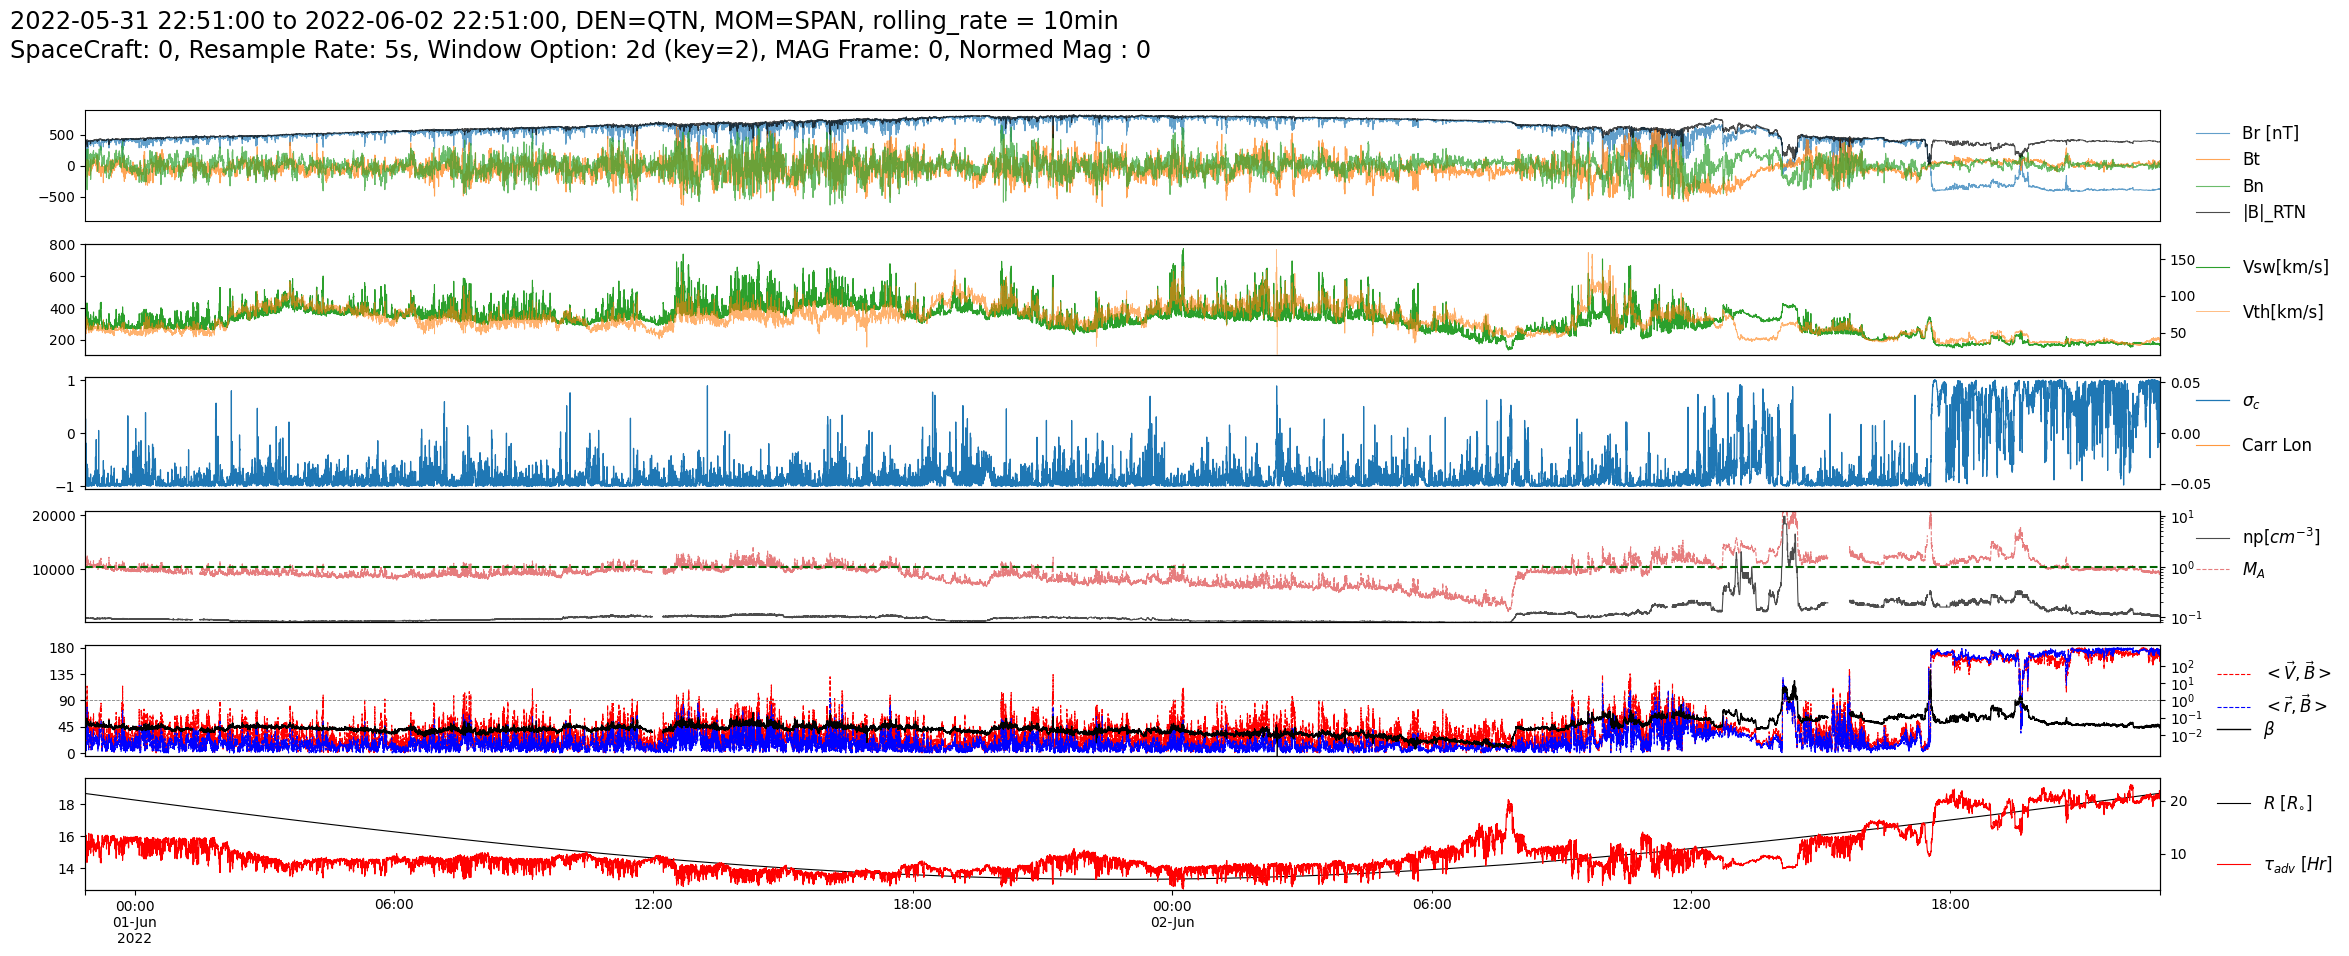

In [9]:
%matplotlib inline
# switch to tk to launch interactive mode
#%matplotlib tk

plt.style.use('default')
collect()
plt.close('all')
tsv.resample_rate = '5s'
tsv.rolling_rate = '10min'
tsv.mag_res = '1s'
tsv.figsize = [25,10]

t0 = t00 + pd.Timedelta('0d')
t1 = t10 - pd.Timedelta('0d')

par_settings = {'density': 'QTN', 'moments': 'SPAN'}#, 'SPAN_settings':{'product':'fit'}}
tsv.use_hampel = True
tsv.hampel_settings = {'window_size': 300, 'n': 6}

tsv.InitFigure(t0, t1, par_settings = par_settings, clean_intervals=True)

plt.subplots_adjust(left = 0.05, right = 0.88, top = 0.88, bottom = 0.1)

tsv.p_funcs = {'show_btot_histogram': {'discard_std':4, 'normality':True, 'downsample_size': 4000}, 'wavelet_PSD':{'coi_thresh': 0.3}, 'struc_funcs':1}

tsv.connect()
clear_output()
plt.show()